In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm

In [44]:
class Lab9(object):
    def __init__(self, d, s, h, c0, c1, init_matrix):
        self._d = d
        self._s = s
        self._h = h
        self._c0 = c0
        self._c1 = c1
        self._prev_matrix = init_matrix.copy()
        self._current_matrix = init_matrix.copy()
        self._n = init_matrix.shape[0]
        self._m = init_matrix.shape[1]
        self._fig = None
    
    def plot_matrix(self, i):
        self._fig.clear(True)
        plt.gcf().canvas.get_renderer()
        self._fig.set_dpi(150)
        self.ax = self._fig.gca(projection='3d')
        self.ax.set_zlim(0.0, 1.0)
        self.ax.zaxis.set_major_locator(LinearLocator(10))
        self.ax.zaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        self.ax.view_init(20, 25)

        X = np.arange(0, 11, 1)
        Y = np.arange(0, 11, 1)
        X, Y = np.meshgrid(X, Y)
        Z = self._current_matrix.copy()
        surf = self.ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                               linewidth=0, antialiased=False)
        self._fig.colorbar(surf, shrink=0.5, aspect=5)
        self._apply()
        return self._fig
    
    def _calculate_value(self, i, j):
        value = self._d * self._s / (self._h**2)
        value *= (
            self._prev_matrix[i+1, j] + 
            self._prev_matrix[i-1, j] + 
            self._prev_matrix[i, j+1] +
            self._prev_matrix[i, j-1] -
            4.0 * self._prev_matrix[i, j]
        )
        return value + self._prev_matrix[i, j]
    
    def print_data(self):
        data = pd.DataFrame(self._current_matrix)
        display(data)
    
    def _apply(self):
        for i in range(1, self._n-1):
            for j in range(1, self._m-1):
                self._current_matrix[i, j] = self._calculate_value(i, j)
        self._prev_matrix = self._current_matrix.copy()
    
    def main(self):
        self._fig = plt.figure()
        self.plot_matrix(0)
        self.plot_matrix(0)
        anim = animation.FuncAnimation(self._fig, self.plot_matrix, frames=50, interval=150)
        anim.save("plot.gif", writer="imagemagick")

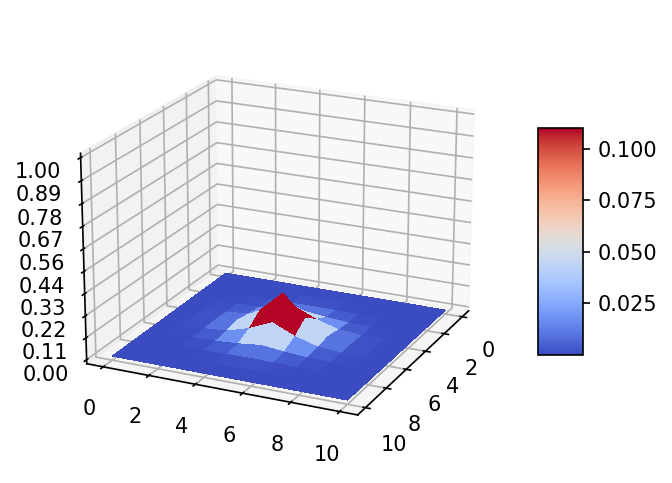

In [45]:
d = 0.01
s = 0.01
h = 0.1
c0 = 0
c1 = 1
init_matrix = np.zeros((11,11), dtype="float")
init_matrix[5][5] = 1.0

lab9 = Lab9(d, s, h, c0, c1, init_matrix)
lab9.main()